# Reading image files

In [45]:
import glob 
import os
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
TRAINING_CSV_PATH = '../data/raw/Final_Training/Images/*/*.csv'

IMAGE_WIDTH = 30 
IMAGE_HEIGHT = IMAGE_WIDTH


In [24]:
os.path.dirname(TRAINING_CSV_PATH)

'../data/raw/Final_Training/Images/*'

In [78]:
def build_images_database(path):
    """Build a pandas Dataframe with all images information.
    
    Parameters 
    ----------
    path: path pattern to read csv files containing images information 
    
    Return 
    ------
    A pandas DataFrame with one line per image 
    """
    
    df_list = []
    for filename in glob.glob(path):
        df = pd.read_csv(filename, sep=';')
        df['path'] = os.path.dirname(filename) + '/' + df['Filename']
        df_list.append(df)
        
    return pd.concat(df_list, ignore_index=True)

# Option en 1 ou 2 parameteres 

#Option en 1 paramètre :
    #[('f1',x1,y1,x2,y2), ('f2',x1,y1,x2,y2), .. ]
    
#Option a 2 paramètres :
    # fournit liste fichier [f1,f2,..] et liste boxe [(x1,y1,..), None]

def build_images_list(filename_list, boxes_list=None):
    """Build a list of images as np.array
    
    
    Parameters
    -------
    filename_list : list of images filenames
    boxes_list : optional list of boxes for clipping within images. Boxes are 4-turples(x1,y1,x2,y2)
    
    Returns 
    ------
    An list of np.array images
    
    """
    
    #If no boxes_list is given, generate a fake boxes list with None boxes
    #image.resize will take full size images if argument box == None 
    if boxes_list is None:
        boxes_list = [None] * len(filename_list)
    
    
    assert len(filename_list) == len(boxes_list), "filename list and boxes list must have the same lenght"
    
    images_list = []
    for (filename, image_box) in zip(filename_list, boxes_list):
        image = Image.open(filename)
        image = image.resize((IMAGE_WIDTH, IMAGE_HEIGHT), box=image_box)
        image = np.array(image)
        images_list.append(image)
        
    return images_list


In [85]:
images_df = build_images_database(TRAINING_CSV_PATH)
images_df.head()

,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,path
0,00000_00000.ppm,38,35,5,5,33,30,31,../data/raw/Final_Training/Images/00031/00000_...
1,00000_00001.ppm,40,36,6,5,34,31,31,../data/raw/Final_Training/Images/00031/00000_...
2,00000_00002.ppm,40,37,5,5,34,32,31,../data/raw/Final_Training/Images/00031/00000_...
3,00000_00003.ppm,41,39,6,6,36,34,31,../data/raw/Final_Training/Images/00031/00000_...
4,00000_00004.ppm,43,37,6,5,38,32,31,../data/raw/Final_Training/Images/00031/00000_...


In [89]:
images_list = build_images_list(images_df.head(2000)['path'].values, 
                                images_df.head(2000).apply(lambda r : (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']), axis=1).values)

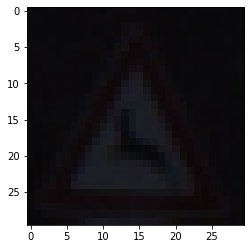

In [90]:
plt.imshow(images_list[99])

In [67]:
images_df.apply(lambda r : (r['Roi.X1'], r['Roi.Y1'], r['Roi.X2'], r['Roi.Y2']), axis=1)

0            (5, 5, 33, 30)
1            (6, 5, 34, 31)
2            (5, 5, 34, 32)
3            (6, 6, 36, 34)
4            (6, 5, 38, 32)
                ...        
39204        (8, 8, 89, 80)
39205        (9, 9, 96, 87)
39206      (11, 9, 109, 96)
39207    (11, 11, 124, 113)
39208    (13, 12, 142, 127)
Length: 39209, dtype: object

In [54]:
images_list

[array([[[ 83,  94, 113],
         [ 93, 106, 126],
         [ 98, 113, 130],
         ...,
         [ 85,  94, 108],
         [ 84,  96, 107],
         [ 85,  99, 109]],
 
        [[ 79,  89, 107],
         [ 86,  97, 115],
         [ 88,  99, 112],
         ...,
         [ 70,  79,  89],
         [ 72,  82,  90],
         [ 74,  84,  94]],
 
        [[ 70,  78,  94],
         [ 78,  86, 100],
         [ 77,  85,  98],
         ...,
         [ 62,  70,  78],
         [ 63,  71,  79],
         [ 63,  71,  81]],
 
        ...,
 
        [[ 35,  36,  40],
         [ 36,  36,  41],
         [ 34,  34,  41],
         ...,
         [ 34,  36,  39],
         [ 34,  36,  40],
         [ 32,  34,  40]],
 
        [[ 38,  39,  42],
         [ 37,  38,  41],
         [ 36,  36,  42],
         ...,
         [ 35,  36,  41],
         [ 33,  35,  40],
         [ 32,  34,  41]],
 
        [[ 35,  37,  41],
         [ 34,  36,  41],
         [ 36,  37,  43],
         ...,
         [ 32,  33,  39],
  

In [21]:
images_df["Width"].value_counts()

34     1327
35     1323
31     1319
33     1316
30     1304
       ... 
243       1
218       1
183       1
184       1
220       1
Name: Width, Length: 187, dtype: int64

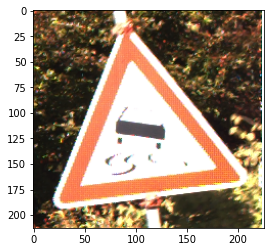

In [30]:
plt.imshow(Image.open(images_df.query('Width == 226')['path'].values[0]))

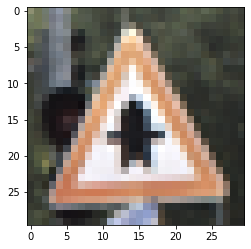

In [43]:
plt.imshow(Image.open(images_df.query('Width == 162')['path'].values[0]).resize((30, 30)))

<AxesSubplot:>

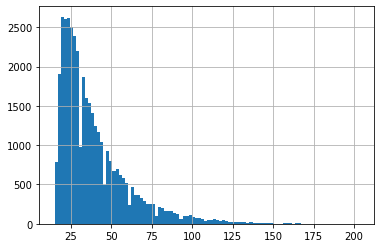

In [33]:
(images_df['Roi.X2'] - images_df['Roi.X1']).hist(bins=100)

In [34]:
(images_df['Roi.X2'] - images_df['Roi.X1']).median()

33.0

In [36]:
(images_df['Roi.Y2'] - images_df['Roi.Y1']).median()

32.0

In [29]:
from PIL import Image
img = Image.open("../data/raw/Final_Training/Images/00000/00000_00000.ppm")

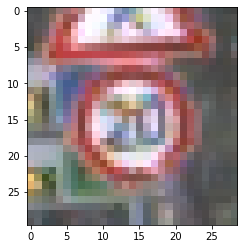

In [5]:
plt.imshow(img)

In [ ]:
import glob 
glob.glob("../data")